# **TUTORIAL 6**
# Distance Based Classification

In pattern recognition, the k-nearest neighbors algorithm is a non-parametric method used for classification and regression.It belongs to the supervised learning domain.

We will understand it with a practice example, Steps we are going to follow are :

1) Import important libraries

2) Importing Data

3) Encoding

4)Training and Test Data

5) Visualization of Data

6) Nearest Neighbour Classifier

7) k Nearest Neighbour

8) Nearest Mean Classifier

9) Compare Results

10) sklearn Library

---



---



**1) Importing important libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

**2) Importing Data**

We will be working on the Iris dataset today.

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Species']=data.target 

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']

We will be taking 2 features, 'SepalLengthCm' and 'PetalWidthCm' for classification for easier visualization.

In [5]:
# Write the code to choose columns 'SepalLengthCm', 'PetalWidthCm' and 'Species' from the dataframe 'df',
# Make a new dataframe 'df_new' and assign the three columns to the new dataframe.

In [6]:
#Write the code below
df_new=df[['SepalLengthCm','PetalWidthCm','Species']].copy()

In [7]:
df_new.head()

,SepalLengthCm,PetalWidthCm,Species
0,5.1,0.2,0
1,4.9,0.2,0
2,4.7,0.2,0
3,4.6,0.2,0
4,5.0,0.2,0


**3) Encoding**

Now we will use Label Encoder to Encode the 'Species' column in numeric. For eg - the species Iris-setosa is encoded as 0, Iris-virginica as 2 and so on.

In [8]:
# Do not make changes in this cell
# Simply execute it and move on
from sklearn.preprocessing import LabelEncoder
labelencoder_Species = LabelEncoder()
df_new['Species_encoded'] = labelencoder_Species.fit_transform(df_new['Species'])
df_new

,SepalLengthCm,PetalWidthCm,Species,Species_encoded
0,5.1,0.2,0,0
1,4.9,0.2,0,0
2,4.7,0.2,0,0
3,4.6,0.2,0,0
4,5.0,0.2,0,0
...,...,...,...,...
145,6.7,2.3,2,2
146,6.3,1.9,2,2
147,6.5,2.0,2,2
148,6.2,2.3,2,2


We break this into X (features - 'SepalLengthCm' and 'PetalWidthCm') and y (output which is 'Species_encoded').

In [9]:
# a)Write the code to choose columns 'SepalLengthCm' and 'PetalWidthCm' from the dataframe 'df_new',
# and assign it to the new dataframe X.
# b)Write the code to choose columns 'Species_encoded' from the dataframe 'df_new',
# and assign it to the new dataframe y.

In [10]:
#Write the code below
X=df_new[['SepalLengthCm','PetalWidthCm']].copy()
Y=df_new['Species_encoded'].copy()

**4) Training and Test data**

We will divide the dataset into training and test dataset to see the accuracy of each of the algorithms that we use :

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Split the dataset into 60% training and 40% test set
# NOTE:- take random_state = 3
# Take the variables as X_train, X_test, y_train and y_test

In [13]:
#Write the code below
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.4,random_state=3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90, 2), (60, 2), (90,), (60,))

We can check the different types of species in the dataset using the unique function :

In [14]:
df_new['Species'].unique()

array([0, 1, 2])

**5) Visualization of data**

Now we will plot the two features on the x and y axis and plot the data with different colour according to the species. 

In [15]:
# Write the code to create datasets according to the different categories of the species from the 
# training set of features
# and assign it to the new dataframes setosa, versicolor and virginica.

In [16]:
#Create datasets according to the category
#For the species setosa           
setosa=df_new[df_new['Species']==0].copy()

#For the species versicolor          
versicolor=df_new[df_new['Species']==1].copy()

#For the species virginica   
virginica=df_new[df_new['Species']==2].copy()


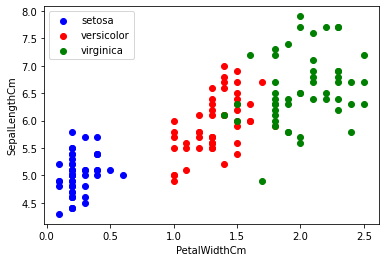

In [17]:
#Plot the data categorywise using scatter plot and visualize the data. Also include labels and legend.
#Write the code below
plt.scatter(setosa['PetalWidthCm'],setosa['SepalLengthCm'],c='b')
plt.scatter(versicolor['PetalWidthCm'],versicolor['SepalLengthCm'],c='r')
plt.scatter(virginica['PetalWidthCm'],virginica['SepalLengthCm'],c='g')
plt.legend(['setosa','versicolor','virginica'])
plt.xlabel('PetalWidthCm')
plt.ylabel('SepalLengthCm')
plt.show()

Let us import the time library to compare the timing of the 3 methods :

In [18]:
import time

**6) Nearest Neighbour Classifier**



In [19]:
# Question 1) Write the algorithm for nearest neighbour classifier as learnt in the theory
#             Assign the answer to ans[0] after converting the output of the method to tuple 

In [20]:
# Algorithm - Calculate the Euclidian distance for each test dataset by comparing with 
#            every trainig dataset and assign it to the variable 'val'
#            The prediciton is the minimum value obtained from all the Euclidian distance 
#             calculated for that test datapoint
# Assign the y_predict to ans[0] as a tuple => (0,1,0,2, and so on) 

In [21]:
ans = [None] * 10
start_time = time.time()                          # Starting the runtime for this cell
y_predict = []                                    # Predicted values of y will be stored
#Write the code below
def nearest_neighbour(test,train,y_train):
  pred=np.empty([test.shape[0]],dtype=int)
  val=np.empty([test.shape[0],train.shape[0]])
  #print(val.shape)
  for i in range(len(test)):
    min=10000000
    for x in range(len(train)):
      dist=((train.iloc[x,0]-test.iloc[i,0])**2+(train.iloc[x,1]-test.iloc[i,1])**2)**0.5
      if dist<min:
        min=dist
        min_i=x
      val[i,x]=dist
    pred[i]=int(y_train.iloc[min_i])
  return pred,val

y_predict,val = nearest_neighbour(X_test,X_train,y_train)
# 1 mark
ans[0] = y_predict
ans[0] = str(ans[0])
#ans[0] = str(ans[0])
time_NN = time.time() - start_time                # Final time taken

print('time taken:',time_NN)
print(ans[0])

time taken: 0.5915162563323975
[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2 1 0 2 1 1 1 1 0 0 2 1 0 0 2
 0 2 2 2 1 0 0 2 1 0 1 1 1 0 0 1 1 1 0 2 0 2 1]


We will concatenate the columns of predicted and y_test dataframe to X_test

In [22]:
# a)Concatenate X_test and y_test dataframe by column and assign it to the new dataframe 'Test_Data'
# b)Concatenate Test_data and Predicted dataframe by column assign it to the new dataframe 'Check_Prediction' 

In [23]:
#Write the code below
Test_Data=X_test.copy()
Test_Data['Species_encoded']=y_test.copy()
Test_Data.head()

,SepalLengthCm,PetalWidthCm,Species_encoded
47,4.6,0.2,0
3,4.6,0.2,0
31,5.4,0.4,0
25,5.0,0.2,0
15,5.7,0.4,0


In [24]:
Check_Prediction=Test_Data.copy()
Check_Prediction['Predicted']=ans[0]
Check_Prediction.head()

,SepalLengthCm,PetalWidthCm,Species_encoded,Predicted
47,4.6,0.2,0,[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2...
3,4.6,0.2,0,[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2...
31,5.4,0.4,0,[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2...
25,5.0,0.2,0,[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2...
15,5.7,0.4,0,[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2...


We will calculate the accuracy now :

In [25]:
# Question 2) Calculate the accuracy obtained for the algorithm used above
#             Assign the accuracy to ans[1] and store it as 'Accuracy_NearestNeighbours'  

In [26]:
#NOTE - Accuracy = Correct_Predictions/Total_Predictions
#Write the code below

Accuracy_NearestNeighbours=np.sum(Check_Prediction['Species_encoded']==Check_Prediction['Predicted'])/len(Check_Prediction)
# 1 mark
ans[1] = Accuracy_NearestNeighbours
print('accuracy:', ans[1])

accuracy: 0.0


Now let us have a look at the values that we did not predicted correctly :

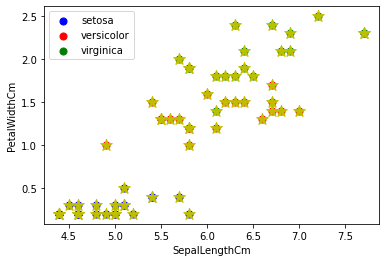

In [27]:
#Plot the data categorywise using scatter plot and visualize the data. Also include labels and legend.
#Write the code below

plt.scatter(Check_Prediction.loc[Check_Prediction['Species_encoded']==0,'SepalLengthCm'],Check_Prediction.loc[Check_Prediction['Species_encoded']==0,'PetalWidthCm'],c='b',s=50)
plt.scatter(Check_Prediction.loc[Check_Prediction['Species_encoded']==1,'SepalLengthCm'],Check_Prediction.loc[Check_Prediction['Species_encoded']==1,'PetalWidthCm'],c='r',s=50)
plt.scatter(Check_Prediction.loc[Check_Prediction['Species_encoded']==2,'SepalLengthCm'],Check_Prediction.loc[Check_Prediction['Species_encoded']==2,'PetalWidthCm'],c='g',s=50)
plt.legend(['setosa','versicolor','virginica'])
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalWidthCm')

#Implement the below code snippet to see the values that were not predicted correctly
for index in Check_Prediction.index:
    if (Check_Prediction['Species_encoded'][index]==Check_Prediction['Predicted'][index]):
        plt.scatter(Check_Prediction['SepalLengthCm'][index],Check_Prediction['PetalWidthCm'][index],marker='x',c='m',s=10)
    else:
        plt.scatter(Check_Prediction['SepalLengthCm'][index],Check_Prediction['PetalWidthCm'][index],marker='*',c='y',s=150)


The magenta cross represents correct predictions and the yellow stars represent incorrect predictions.

We see that even if there is an outlier, if the test value is close to that value, it will be predicted in that class, which may not always be right. Hence we move on to the k Nearest Neighbor.

**7)  K Nearest Neighbour**

Choosing the value of k for the algorithm could be a difficult task. A small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive.

We will have to check which value suits well. Let us start with k = 5.

Now we will move on to K Nearest Neighbour classifier:

In [28]:
# Question 3) Algorithm - Calculate the Euclidian distance for each test dataset by comparing 
#             with every training dataset and assign it to the variable 'val'
#            Sort the distances obtained and take the k smallest values.
#            Take their species values.
#            The prediciton is the maximum frequency among all the k sorted values.  
#           # Assign the y_predict to ans[2] as a tuple => (0,1,0,2, and so on)  

In [29]:
from scipy import stats

start_time = time.time()
k = 5
y_predict = []
#Write the code below
def knn(test,train,y_train,k):
  pred=np.empty([test.shape[0]],dtype=int)
  pred_intermediate=np.empty([test.shape[0],train.shape[0],2])
  val=np.empty([test.shape[0],train.shape[0]])
  #print(val.shape)
  for i in range(len(test)):
    for x in range(len(train)):
      val[i,x]=((train.iloc[x,0]-test.iloc[i,0])**2+(train.iloc[x,1]-test.iloc[i,1])**2)**0.5

    pred_intermediate[i,:,0]=val[i,:].copy()
    pred_intermediate[i,:,1]=y_train.copy()
    #print(pred_intermediate[i,:3,:3])
    sorted_pred = pred_intermediate[i,np.argsort(pred_intermediate[i,:, 0]),:]
    #print(sorted_pred[:3,:3])
    #print(pred_intermediate[i,:k,1])
    pred[i]=stats.mode(sorted_pred[:k,1])[0]

  return pred,val

y_predict,val = knn(X_test,X_train,y_train,k)
# 1 mark
ans[2] = y_predict
ans[2] = str(ans[2])
time_k5_NN = time.time() - start_time

print('time taken:',time_k5_NN)
print(ans[2])

time taken: 0.5978672504425049
[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 1 1 1 1 0 0 2 1 0 0 1
 0 2 1 2 1 0 0 2 1 0 1 2 1 0 0 2 2 1 0 2 0 2 1]


In [30]:
# a):Concatenate X_test and y_test dataframe by column and assign it to the new dataframe 'Test_Data'
# b):Concatenate Test_data and Predicted dataframe by column assign it to the new dataframe 'Check_Prediction' 

In [31]:
# Write the code below
Test_Data=X_test.copy()
Test_Data['Species_encoded']=y_test.copy()
Test_Data.head()

,SepalLengthCm,PetalWidthCm,Species_encoded
47,4.6,0.2,0
3,4.6,0.2,0
31,5.4,0.4,0
25,5.0,0.2,0
15,5.7,0.4,0


In [32]:
Check_Prediction=Test_Data.copy()
Check_Prediction['Predicted']=ans[2]
Check_Prediction.head()

,SepalLengthCm,PetalWidthCm,Species_encoded,Predicted
47,4.6,0.2,0,[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2...
3,4.6,0.2,0,[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2...
31,5.4,0.4,0,[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2...
25,5.0,0.2,0,[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2...
15,5.7,0.4,0,[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2...


We will calculate the accuracy now :

In [33]:
# Question 4) :Calculate the accuracy obtained for the algorithm used above
#             Assign the accuracy to ans[3] and store it as 'Accuracy_k5_NearestNeighbours' 

In [34]:
#NOTE - Accuracy = Correct_Predictions/Total_Predictions
#Write the code below

Accuracy_k5_NearestNeighbours=np.sum(Check_Prediction['Species_encoded']==Check_Prediction['Predicted'])/len(Check_Prediction)
# 1 mark
ans[3] = Accuracy_k5_NearestNeighbours
print('accuracy:', ans[3])

accuracy: 0.0


Now let us have a look at the values that we did not predicted correctly :

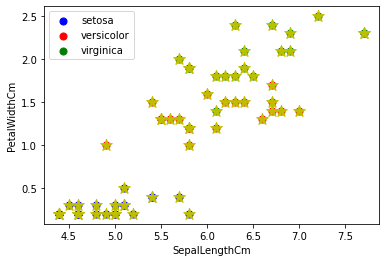

In [35]:
#Plot the data categorywise using scatter plot and visualize the data. Also include labels and legend.
#Write the code below

plt.scatter(Check_Prediction.loc[Check_Prediction['Species_encoded']==0,'SepalLengthCm'],Check_Prediction.loc[Check_Prediction['Species_encoded']==0,'PetalWidthCm'],c='b',s=50)
plt.scatter(Check_Prediction.loc[Check_Prediction['Species_encoded']==1,'SepalLengthCm'],Check_Prediction.loc[Check_Prediction['Species_encoded']==1,'PetalWidthCm'],c='r',s=50)
plt.scatter(Check_Prediction.loc[Check_Prediction['Species_encoded']==2,'SepalLengthCm'],Check_Prediction.loc[Check_Prediction['Species_encoded']==2,'PetalWidthCm'],c='g',s=50)
plt.legend(['setosa','versicolor','virginica'])
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalWidthCm')

#Implement the below code snippet to see the values that were not predicted correctly
for index in Check_Prediction.index:
    if (Check_Prediction['Species_encoded'][index]==Check_Prediction['Predicted'][index]):
        plt.scatter(Check_Prediction['SepalLengthCm'][index],Check_Prediction['PetalWidthCm'][index],marker='x',c='m',s=10)
    else:
        plt.scatter(Check_Prediction['SepalLengthCm'][index],Check_Prediction['PetalWidthCm'][index],marker='*',c='y',s=150)

From this plot, it is visible that some of the outlier cases wrongly predicted in previous method are being taken care of by kNN. Still there could always be some errors near boundary lines.

Choosing an optimum value of k is very important. Let us see the problems when k is too large or too less.

First when k is too small :

Let us check for k = 1.

We are adding some outliers in the data to see what the KNN for k=1 predicts.

In [36]:
#adding outliers in the data
X_test.loc[len(X_test.index)] = [4.5, 1.5]  
X_test.loc[len(X_test.index)] = [4.8, 1.5]  
X_test.loc[len(X_test.index)] = [7, 1.5]  
X_test.loc[len(X_test.index)] = [5, 0.85]  
y_test[len(y_test.index)] = int(1)
y_test[len(y_test.index)] = int(1)
y_test[len(y_test.index)] = int(2)
y_test[len(y_test.index)] = int(0)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [37]:
# Now implement KNN algorithm with k = 1

In [38]:
start_time = time.time()
k = 1
y_predict = []
#Write the code below
y_predict,val = knn(X_test,X_train,y_train,k)

time_k1_NN = time.time() - start_time

print('time taken:',time_k1_NN)
print(y_predict)

time taken: 0.6762087345123291
[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2 1 0 2 1 1 1 1 0 0 2 1 0 0 2
 0 2 2 2 1 0 0 2 1 0 1 1 1 0 0 1 1 1 0 2 0 2 1 2 2 1 1]


In [39]:
# a):Concatenate X_test and y_test dataframe by column and assign it to the new dataframe 'Test_Data'
# b):Concatenate Test_data and Predicted dataframe by column assign it to the new dataframe 'Check_Prediction' 

In [40]:
# Write the code below
Test_Data=X_test.copy()
Test_Data['Species_encoded']=y_test.copy()
Test_Data.head()

,SepalLengthCm,PetalWidthCm,Species_encoded
47,4.6,0.2,0
3,4.6,0.2,0
31,5.4,0.4,0
25,5.0,0.2,0
15,5.7,0.4,0


In [41]:
Check_Prediction=Test_Data.copy()
Check_Prediction['Predicted']=y_predict
Check_Prediction.head()

,SepalLengthCm,PetalWidthCm,Species_encoded,Predicted
47,4.6,0.2,0,0
3,4.6,0.2,0,0
31,5.4,0.4,0,0
25,5.0,0.2,0,0
15,5.7,0.4,0,0


We will calculate the accuracy now :

In [42]:
# Question 5) :Calculate the accuracy obtained for the algorithm used above
#             Assign the accuracy to ans[4] and store it as 'Accuracy_k2_NearestNeighbours'

In [43]:
#NOTE - Accuracy = Correct_Predictions/Total_Predictions
#Write the code below

Accuracy_k1_NearestNeighbours=np.sum(Check_Prediction['Species_encoded']==Check_Prediction['Predicted'])/len(Check_Prediction)
# 1 mark
ans[4] = Accuracy_k1_NearestNeighbours
print('accuracy:', ans[4])

accuracy: 0.84375


As we can clearly see that KNN for k=1 doesn't do well in case of outliers. Hence, we increase the value of k to get better results.

Let us check for k = 2.

In [44]:
# Now implement KNN algorithm with k = 2

In [45]:
start_time = time.time()
k = 2
y_predict = []
#Write the code below
y_predict,val = knn(X_test,X_train,y_train,k)

time_k2_NN = time.time() - start_time

print('time taken:',time_k2_NN)
print(y_predict)

time taken: 0.6396379470825195
[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 1 0 2 2 2 1 0 2 1 1 1 1 0 0 2 1 0 0 1
 0 2 1 2 1 0 0 2 1 0 1 1 1 0 0 1 1 1 0 2 0 2 1 1 1 1 1]


In [46]:
# a):Concatenate X_test and y_test dataframe by column and assign it to the new dataframe 'Test_Data'
# b):Concatenate Test_data and Predicted dataframe by column assign it to the new dataframe 'Check_Prediction' 

In [47]:
# Write the code below
Test_Data=X_test.copy()
Test_Data['Species_encoded']=y_test.copy()
Test_Data.head()

,SepalLengthCm,PetalWidthCm,Species_encoded
47,4.6,0.2,0
3,4.6,0.2,0
31,5.4,0.4,0
25,5.0,0.2,0
15,5.7,0.4,0


In [48]:
Check_Prediction=Test_Data.copy()
Check_Prediction['Predicted']=y_predict
Check_Prediction.head()

,SepalLengthCm,PetalWidthCm,Species_encoded,Predicted
47,4.6,0.2,0,0
3,4.6,0.2,0,0
31,5.4,0.4,0,0
25,5.0,0.2,0,0
15,5.7,0.4,0,0


We will calculate the accuracy now :

In [49]:
# Question 6) :Calculate the accuracy obtained for the algorithm used above
#             Assign the accuracy to ans[5] and store it as 'Accuracy_k2_NearestNeighbours'

In [50]:
#NOTE - Accuracy = Correct_Predictions/Total_Predictions
#Write the code below

Accuracy_k2_NearestNeighbours=np.sum(Check_Prediction['Species_encoded']==Check_Prediction['Predicted'])/len(Check_Prediction)
# 1 mark
ans[5] = Accuracy_k2_NearestNeighbours
print('accuracy:', ans[5])

accuracy: 0.90625


As we can see, when k is too small, it is better than Nearest Neighbour but __A__ accurate than k = 5.



In [51]:
#Question 7) What will come inplace of A 
#            Assign the answer to ans[6] for A 
# A = less or more? Write your response as "less" or "more" to the ans[6].
# Answer is case sensitive. Adhere to the choices given.

In [52]:
# 1 marks
ans[6] = "less"

Now let us see when k is large, for example k = 12 :

In [53]:
# Now implement KNN algorithm with k = 12

In [54]:
start_time = time.time()
k = 12
y_predict = []
#Write the code below
y_predict,val = knn(X_test,X_train,y_train,k)

time_k12_NN = time.time() - start_time

print('time taken:',time_k12_NN)
print(y_predict)

time taken: 0.6932706832885742
[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 1 1 1 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2 1 0 1 2 1 0 0 2 2 1 0 2 0 2 1 1 1 2 1]


In [55]:
# a):Concatenate X_test and y_test dataframe by column and assign it to the new dataframe 'Test_Data'
# b):Concatenate Test_data and Predicted dataframe by column assign it to the new dataframe 'Check_Prediction'

In [56]:
# Write the code below
Test_Data=X_test.copy()
Test_Data['Species_encoded']=y_test.copy()
Test_Data.head()

,SepalLengthCm,PetalWidthCm,Species_encoded
47,4.6,0.2,0
3,4.6,0.2,0
31,5.4,0.4,0
25,5.0,0.2,0
15,5.7,0.4,0


In [57]:
Check_Prediction=Test_Data.copy()
Check_Prediction['Predicted']=y_predict
Check_Prediction.head()

,SepalLengthCm,PetalWidthCm,Species_encoded,Predicted
47,4.6,0.2,0,0
3,4.6,0.2,0,0
31,5.4,0.4,0,0
25,5.0,0.2,0,0
15,5.7,0.4,0,0


We will calculate the accuracy now :

In [58]:
# Question 8) :Calculate the accuracy obtained for the algorithm used above
#              Assign the accuracy to ans[7] and store it as 'Accuracy_k12_NearestNeighbours'

In [59]:
#NOTE - Accuracy = Correct_Predictions/Total_Predictions
#Write the code below

Accuracy_k12_NearestNeighbours=np.sum(Check_Prediction['Species_encoded']==Check_Prediction['Predicted'])/len(Check_Prediction)
# 1 mark
ans[7] = Accuracy_k12_NearestNeighbours
print('accuracy:', ans[7])

accuracy: 0.9375


We see that the accuracy is good but it is lower than when k = 5. This is because when the dataset is small and the value of k is too big, it looks at too many points in the surrounding and sometimes gets the wrong prediction about which class it belongs to.

**8) Nearest Mean Classification**

Here we take the mean for each of the classes and compare the test cases with them to reduce computational time.

In [60]:
setosa_PetalWidth = setosa['PetalWidthCm'].mean()                         # Calculate the mean for all the features of all the classes
setosa_SepalLength = setosa['SepalLengthCm'].mean()

versicolor_PetalWidth = versicolor['PetalWidthCm'].mean()
versicolor_SepalLength = versicolor['SepalLengthCm'].mean()

virginica_PetalWidth = virginica['PetalWidthCm'].mean()
virginica_SepalLength = virginica['SepalLengthCm'].mean()

In [61]:
mean_array=np.array([[setosa_SepalLength,setosa_PetalWidth],
                     [versicolor_SepalLength,versicolor_PetalWidth], 
                     [virginica_SepalLength,virginica_PetalWidth]])
mean_array

array([[5.006, 0.246],
       [5.936, 1.326],
       [6.588, 2.026]])

In [62]:
# Algorithm - Calculate the Euclidian distance for each test dataset by comparing with mean of every class
#            The predicited class is the minimum value obtained from all the Euclidian distance calculated for that test datapoint 

In [63]:
start_time = time.time()
y_predict = []
#Write the code below
def nearest_mean_classfication(test):
  pred=np.empty([test.shape[0]],dtype=int)
  pred_intermediate=np.empty([test.shape[0],mean_array.shape[0],2])
  val=np.empty([test.shape[0],mean_array.shape[0]])
  #print(val.shape)
  for i in range(len(test)):
    for x in range(len(mean_array)):
      val[i,x]=((mean_array[x,0]-test.iloc[i,0])**2+(mean_array[x,1]-test.iloc[i,1])**2)**0.5

    pred_intermediate[i,:,0]=val[i,:].copy()
    pred_intermediate[i,:,1]=[0,1,2]
    #print(pred_intermediate[i,:3,:3])
    #sorted_pred = pred_
    sorted_pred = pred_intermediate[i,np.argsort(pred_intermediate[i,:, 0]),:]
    
    #print(sorted_pred[:3])
    #print(pred_intermediate[i,:k,1])
    pred[i]=sorted_pred[0,1]

  return pred,val

y_predict,val = nearest_mean_classfication(X_test)

time_NM = time.time() - start_time

print('time taken:',time_NM)
print(y_predict)

time taken: 0.012941598892211914
[0 0 0 0 0 2 1 0 2 2 1 0 1 1 2 0 1 2 1 0 2 2 2 2 0 2 1 1 0 2 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 1 1 0 1 1 1 0 0 1 2 1 0 2 0 2 1 0 1 2 0]


In [64]:
# a):Concatenate X_test and y_test dataframe by column and assign it to the new dataframe 'Test_Data'
# b):Concatenate Test_data and Predicted dataframe by column assign it to the new dataframe 'Check_Prediction'

In [65]:
# Write the code below
Test_Data=X_test.copy()
Test_Data['Species_encoded']=y_test.copy()
Test_Data.head()

,SepalLengthCm,PetalWidthCm,Species_encoded
47,4.6,0.2,0
3,4.6,0.2,0
31,5.4,0.4,0
25,5.0,0.2,0
15,5.7,0.4,0


In [66]:
Check_Prediction=Test_Data.copy()
Check_Prediction['Predicted']=y_predict
Check_Prediction.head()

,SepalLengthCm,PetalWidthCm,Species_encoded,Predicted
47,4.6,0.2,0,0
3,4.6,0.2,0,0
31,5.4,0.4,0,0
25,5.0,0.2,0,0
15,5.7,0.4,0,0


We will calculate the accuracy now :

In [67]:
# Question 9) :Calculate the accuracy obtained for the algorithm used above
#              Assign the accuracy to ans[8] and store it as 'Accuracy_NearestMean'

In [68]:
#NOTE - Accuracy = Correct_Predictions/Total_Predictions
#Write the code below

Accuracy_NearestMean=np.sum(Check_Prediction['Species_encoded']==Check_Prediction['Predicted'])/len(Check_Prediction)
# 1 mark
ans[8] = Accuracy_NearestMean
print('accuracy:', ans[8])

accuracy: 0.8125


Now let us have a look at the values that we did not predicted correctly :

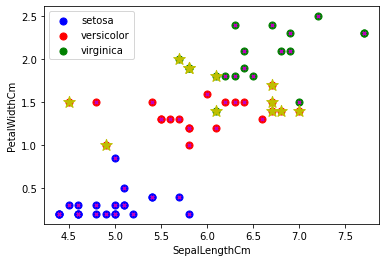

In [69]:
#Plot the data categorywise using scatter plot and visualize the data. Also include labels and legend.
#Write the code below

plt.scatter(Check_Prediction.loc[Check_Prediction['Species_encoded']==0,'SepalLengthCm'],Check_Prediction.loc[Check_Prediction['Species_encoded']==0,'PetalWidthCm'],c='b',s=50)
plt.scatter(Check_Prediction.loc[Check_Prediction['Species_encoded']==1,'SepalLengthCm'],Check_Prediction.loc[Check_Prediction['Species_encoded']==1,'PetalWidthCm'],c='r',s=50)
plt.scatter(Check_Prediction.loc[Check_Prediction['Species_encoded']==2,'SepalLengthCm'],Check_Prediction.loc[Check_Prediction['Species_encoded']==2,'PetalWidthCm'],c='g',s=50)
plt.legend(['setosa','versicolor','virginica'])
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalWidthCm')

#Implement the below code snippet to see the values that were not predicted correctly
for index in Check_Prediction.index:
    if (Check_Prediction['Species_encoded'][index]==Check_Prediction['Predicted'][index]):
        plt.scatter(Check_Prediction['SepalLengthCm'][index],Check_Prediction['PetalWidthCm'][index],marker='x',c='m',s=10)
    else:
        plt.scatter(Check_Prediction['SepalLengthCm'][index],Check_Prediction['PetalWidthCm'][index],marker='*',c='y',s=150)

We should only use this method if time complexity is really important to us as this method estimates the boundary just based on the mean which cannot be always relied on. Hence we see that as the mean of Green and Blue are close together, there are many wrong predictions in that region.

**9) Compare Results**

In [70]:
# Do not make changes in this cell
# Simply execute it and move on
print("ACCURACIES:\n")
print("Nearest Neighbours=",Accuracy_NearestNeighbours)
print("K Nearest Neighbours(k = 5) =",Accuracy_k5_NearestNeighbours)
print("K Nearest Neighbours(k = 2) =",Accuracy_k2_NearestNeighbours)
print("K Nearest Neighbours(k = 12) =",Accuracy_k12_NearestNeighbours)
print("Nearest Mean=",Accuracy_NearestMean)
print("=========================================================================")
print("TIMINGS:\n")
print("Nearest Neighbours=",time_NN)
print("K Nearest Neighbours(k = 5) =",time_k5_NN)
print("K Nearest Neighbours(k = 2) =",time_k2_NN)
print("K Nearest Neighbours(k = 12) =",time_k12_NN)
print("Nearest Mean=",time_NM)
print("=========================================================================")

ACCURACIES:

Nearest Neighbours= 0.0
K Nearest Neighbours(k = 5) = 0.0
K Nearest Neighbours(k = 2) = 0.90625
K Nearest Neighbours(k = 12) = 0.9375
Nearest Mean= 0.8125
TIMINGS:

Nearest Neighbours= 0.5915162563323975
K Nearest Neighbours(k = 5) = 0.5978672504425049
K Nearest Neighbours(k = 2) = 0.6396379470825195
K Nearest Neighbours(k = 12) = 0.6932706832885742
Nearest Mean= 0.012941598892211914


On comparing the 3 timings of kNN, we see that the model with least k takes the __B__ time. It feels wrong but it does makes sense. I will explain why.

When k is low, the decision boundary changes a lot of times, ie there is a sudden change in the class in a small distance, while when k is large, the decision boundary is smoother and does not changes as often which helps when it comes to time complexity.

In [71]:
#Question 10) What will come inplace of B 
#            Assign the answer to ans[9] for B 
# B = highest or lowest? Write your response as "highest" or "lowest" to the ans[9].
# Answer is case sensitive. Adhere to the choices given.

In [72]:
# 1 marks
ans[9] = 'highest' 

On comparing the 3 plots, we can see that most of the errors occur at the boundary of 2 different classes. We reduce it slightly using the k nearest neighbours but not completely. 

Although Nearest mean has a significantly lower time than the other 2 processes, it is not a preffered method. It is because it has very low accuracy and it is very uncertain.

The most preffered algorithm is the k nearest neighbour algorithm as it gives very good accuracy as well as acceptable runtime.

**sklearn Library**

There is an inbuilt function to directly perform kNN from sklearn library.

In [73]:
# Do not make changes in the below cells
# Simply execute it and move on

In [74]:
# Import the library

from sklearn.neighbors import KNeighborsClassifier 

We will first do for k = 4

In [75]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train,y_train)
Predicted = neigh.predict(X_test)
print(Predicted)

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 1 1 1 1 0 0 2 1 0 0 1
 0 2 1 2 1 0 0 2 1 0 1 2 1 0 0 2 1 1 0 2 0 2 1 1 1 1 1]


In [76]:
y_test_n=np.array(y_test,dtype=int)
print(y_test_n)

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 1
 0 2 1 2 1 0 0 2 1 0 1 2 1 0 0 2 1 1 0 2 0 2 1 1 1 2 0]


sklearn also has a funtion to calculate accuracy

In [77]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy = ",metrics.accuracy_score(y_test,Predicted))

Accuracy =  0.953125


In [78]:
# Run the this cell to submit your answers and get score evaluated"
# Do not make any changes in this cell
# Simply execute it and move on
import json

ans = [item for item in ans]
print(ans)
with open('ans.json', 'w') as f:
    json.dump(ans, f)

['[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 2 2 2 0 2 2 2 1 0 2 1 1 1 1 0 0 2 1 0 0 2\n 0 2 2 2 1 0 0 2 1 0 1 1 1 0 0 1 1 1 0 2 0 2 1]', 0.0, '[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 1 1 1 1 0 0 2 1 0 0 1\n 0 2 1 2 1 0 0 2 1 0 1 2 1 0 0 2 2 1 0 2 0 2 1]', 0.0, 0.84375, 0.90625, 'less', 0.9375, 0.8125, 'highest']


In [79]:
! ../submit ans.json

/bin/bash: ../submit: No such file or directory


That is all for Tutorial 6.